#### 6. Develop a program to forecast future values in time series data, such as weather patterns, using RNN models like LSTM or GRU.
(Using daily-minimum-temperature data)

In [31]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [32]:
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

df = pd.read_csv('./daily-min-temperatures.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [33]:
data = df['Temp'].values.reshape(-1, 1)
data.shape

(3650, 1)

In [34]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_norm = scaler.fit_transform(data)
data_norm = data_norm.flatten()
data_norm.shape

(3650,)

In [35]:
X, y = [], []
for i in range(len(data_norm) - 10):
    X.append(data_norm[i:i+10])
    y.append(data_norm[i+10])

In [36]:
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [37]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(1)
])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [41]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
46/46 [==============================] - 2s 11ms/step - loss: 0.0331 - mae: 0.1357 - val_loss: 0.0105 - val_mae: 0.0798
Epoch 2/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0122 - mae: 0.0860 - val_loss: 0.0102 - val_mae: 0.0787
Epoch 3/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0117 - mae: 0.0844 - val_loss: 0.0099 - val_mae: 0.0774
Epoch 4/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0115 - mae: 0.0840 - val_loss: 0.0097 - val_mae: 0.0768
Epoch 5/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0115 - mae: 0.0838 - val_loss: 0.0096 - val_mae: 0.0763
Epoch 6/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0113 - mae: 0.0833 - val_loss: 0.0095 - val_mae: 0.0759
Epoch 7/10
46/46 [==============================] - 0s 4ms/step - loss: 0.0112 - mae: 0.0828 - val_loss: 0.0094 - val_mae: 0.0755
Epoch 8/10
46/46 [==============================] - 0s 5ms/step - loss: 0.0112 - mae: 0.0

In [42]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Mean Absolute Error: {test_mae}")

23/23 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0749
Test Loss: 0.00922217033803463
Mean Absolute Error: 0.07494312524795532


23/23 [==============================] - 0s 1ms/step


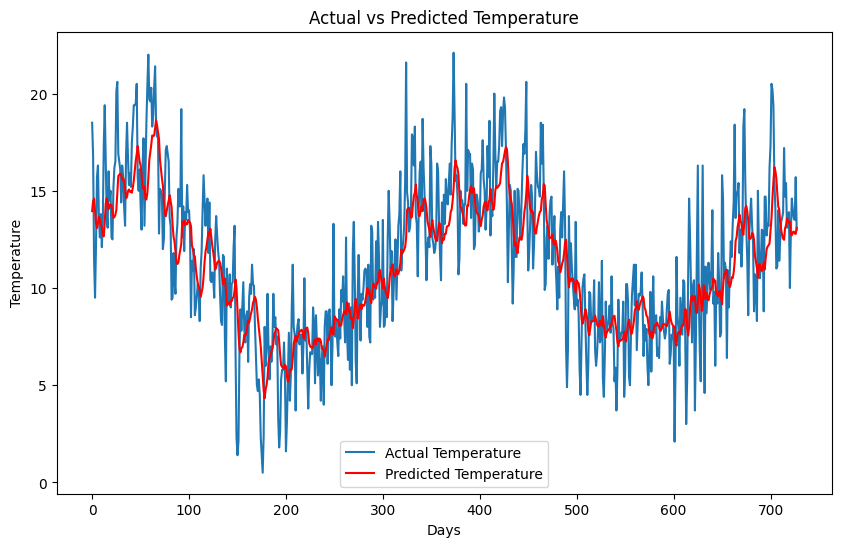

In [43]:
#OPTIONAL
predictions = model.predict(X_test)

predicted_data = scaler.inverse_transform(predictions)
actual_data = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_data, label='Actual Temperature')
plt.plot(predicted_data, label='Predicted Temperature', color='red')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()


**Future Predictions**

In [44]:
preds = []
seq = X_train[-1]

for _ in range(10):
    pred = model.predict(seq.reshape(1, 10, 1), verbose=0)[0, 0]
    preds.append(pred)
    seq = np.roll(seq, -1) # shift sequence
    seq[-1] = pred # append predicted value

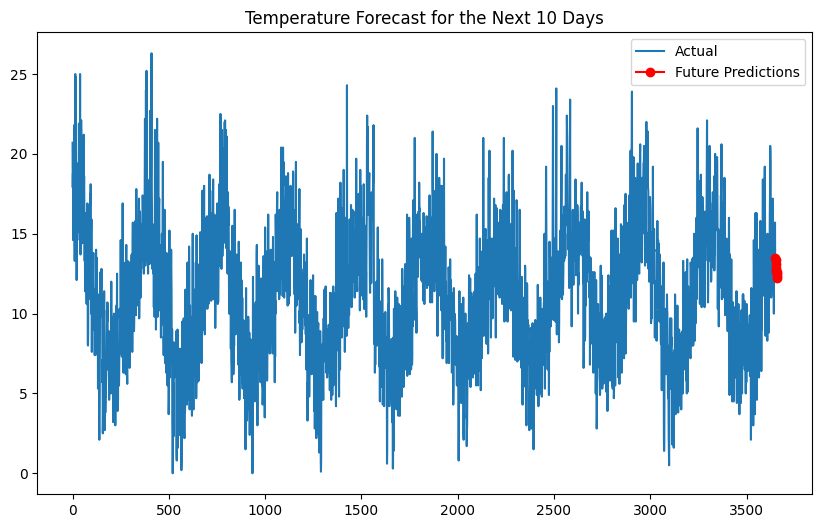

In [45]:
predicted_data = scaler.inverse_transform(np.array(preds).reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(df['Temp'], label='Actual')
plt.plot(range(len(df['Temp']), len(df['Temp']) + 10), predicted_data, 'ro-', label='Future Predictions')
# plt.plot(range(len(df['Temp'])-10, len(df['Temp'])-10+len(predicted_data)), predicted_data, 'ro-', label='Predicted')
plt.legend()
plt.title('Temperature Forecast for the Next 10 Days')
plt.show()